# Perceptron Algorithm 
### Music Genre Classification

In this notebook, we will use the **Perceptron** algorithm to classify music genres.

## Steps:
1. **Preprocessing** the data: We will normalize and select relevant features.
2. **Training the Perceptron**: The Perceptron will learn from the training data.
3. **Evaluating the Model**: We will assess the model's accuracy.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 2. Load the Music Dataset

Next, we load the music dataset and filter it to keep only the tracks that belong to **pop**, **rock**, or **acoustic** genres.


In [8]:
# Load the dataset
music_df = pd.read_csv('spotify_dataset.csv')

# Filter for the 3 genres: Pop, Rock, Acoustic
music_df = music_df[music_df['track_genre'].isin(['pop', 'rock', 'acoustic'])]

# Check the first few rows of the filtered dataset
music_df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## 3. Data Preprocessing

We will now:
- Select the relevant features (e.g., `danceability`, `energy`, `loudness`, `tempo`).
- Convert the genre labels (`pop`, `rock`, `acoustic`) into numeric values.
- Normalize the feature values for better performance of the Perceptron model.

In [9]:
# Select the features (e.g., danceability, energy, loudness, tempo)
X = music_df[['danceability', 'energy', 'loudness', 'tempo']]

# Convert genres to numeric labels
y = music_df['track_genre'].map({'pop': 0, 'rock': 1, 'acoustic': 2})

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 4. Implementing the Perceptron Class

Here, we implement the Perceptron algorithm, which includes methods for training the model and making predictions.

In [10]:
class Perceptron:
    def __init__(self, eta=0.5, epochs=50):
        self.eta = eta  # Learning rate
        self.epochs = epochs  # Number of epochs

    def train(self, X, y):
        # Initialize weights with random values
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                # Update rule for weights
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update * xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                break  # If no errors, stop early
            else:
                self.errors_.append(errors)

    def net_input(self, X):
        # Compute the linear weighted sum of the inputs
        return np.dot(X, self.w_[:-1]) + self.w_[-1]

    def predict(self, X):
        # Predict class label based on the sign of net input
        return np.where(self.net_input(X) >= 0.0, 1, -1)


## 5. Training the Perceptron

We will now train the Perceptron on the training data using the `train()` method and evaluate the model’s accuracy on the test data.

In [11]:
# Instantiate the Perceptron model
percep = Perceptron(eta=0.1, epochs=1000)

# Train the model with the training data
percep.train(X_train, y_train)

# Make predictions on the test data
y_pred = percep.predict(X_test)

# Evaluate the accuracy of the model
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 29.33%


## 6. Visualizing the Decision Boundaries

Now, we will visualize the decision boundaries of the trained Perceptron model. This will help us understand how well the model separates the three genres based on the selected features.


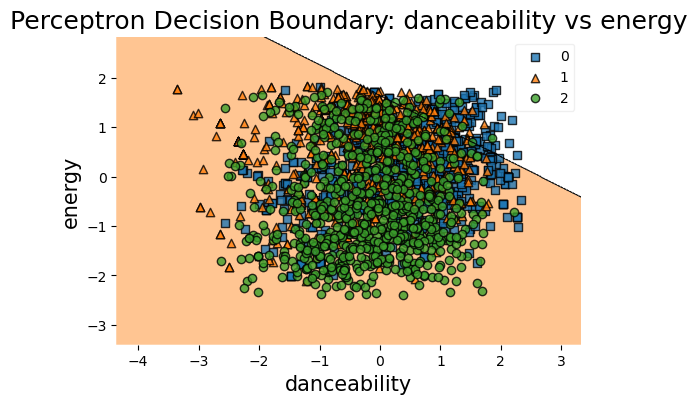

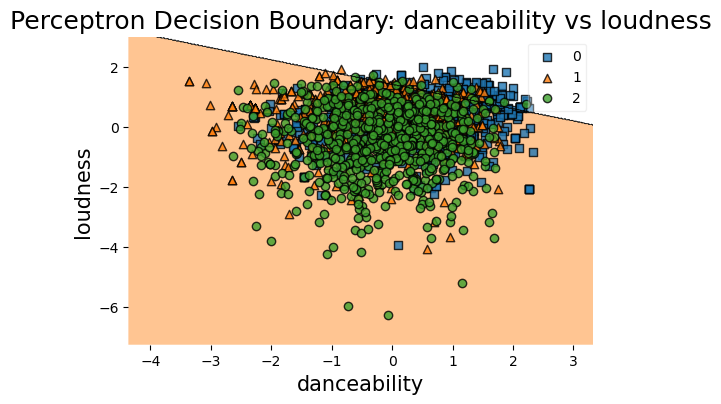

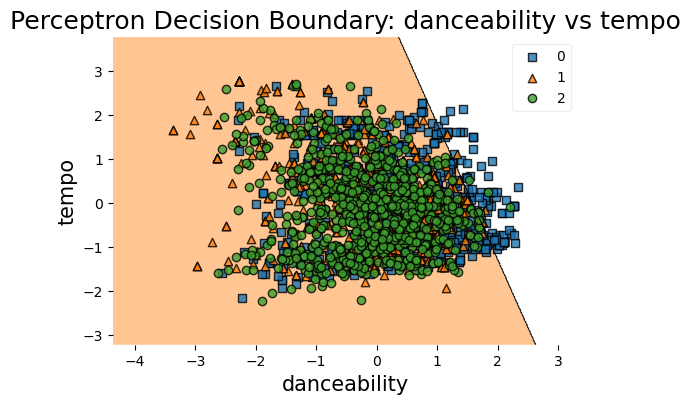

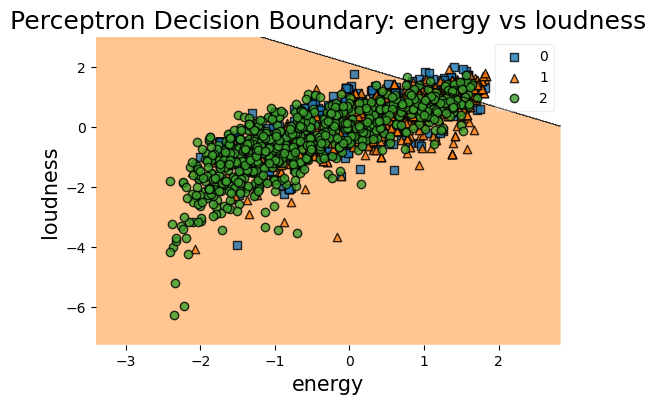

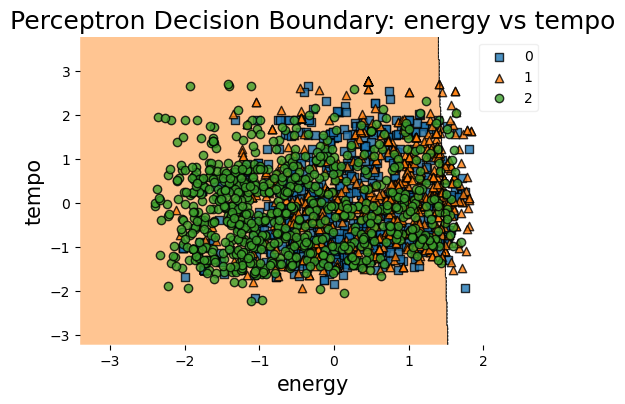

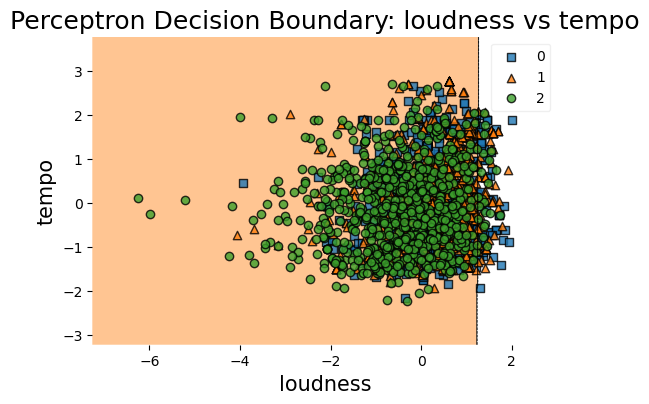

In [17]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# List of feature names
feature_names = ['danceability', 'energy', 'loudness', 'tempo']

# Create all pairs of features
feature_pairs = list(itertools.combinations(range(X_train.shape[1]), 2))

# Plot decision boundaries for each pair of features
for pair in feature_pairs:
    # Select the pair of features for training
    X_train_2d = X_train[:, pair]
    
    # Re-train the Perceptron on this pair of features
    percep_2d = Perceptron(eta=0.1, epochs=1000)
    percep_2d.train(X_train_2d, y_train.values)
    
    # Visualize the decision boundary using the selected two features
    plt.figure(figsize=(6, 4))
    plot_decision_regions(X_train_2d, y_train.values, clf=percep_2d)
    plt.title(f"Perceptron Decision Boundary: {feature_names[pair[0]]} vs {feature_names[pair[1]]}", fontsize=18)
    plt.xlabel(feature_names[pair[0]], fontsize=15)
    plt.ylabel(feature_names[pair[1]], fontsize=15)
    plt.show()
